In [3]:
import numpy as np
from experiments.utils.SimpleComparison import SimpleComparison
from hdimvis.algorithms.spring_force_algos.chalmers96_algo.Chalmers96 import Chalmers96
from hdimvis.visualise_layouts_and_metrics.plot import show_layout,show_generation_metrics
from hdimvis.algorithms.stochastic_ntet_algo.SNeD import SNeD
from hdimvis.create_low_d_layout.LayoutCreation import LayoutCreation
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from experiments.utils.get_avg_classwise_f1 import get_avg_classwise_f1
from experiments.utils.get_kmeans_f1 import get_kmeans_f1
from experiments.utils.get_f1_for_best_k_with_knn import get_f1_for_best_k_with_knn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from pathlib import Path
from definitions import PROJECT_ROOT
import pickle
from scipy import stats



squad


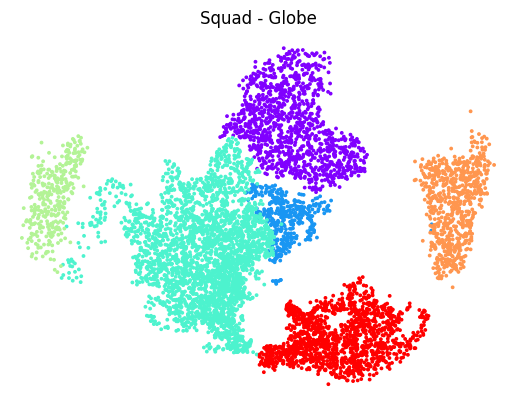

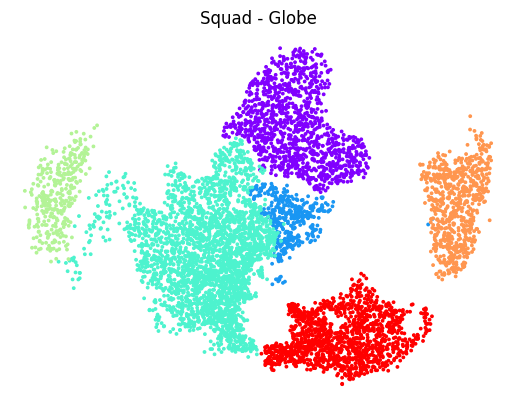

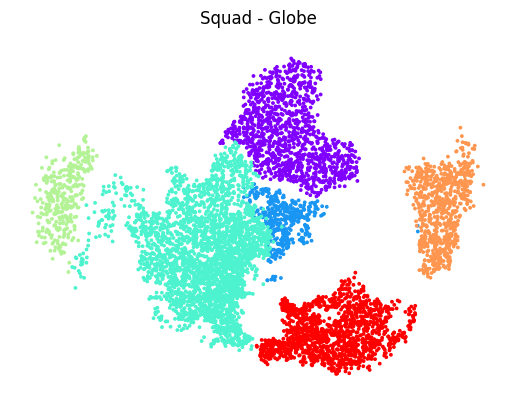

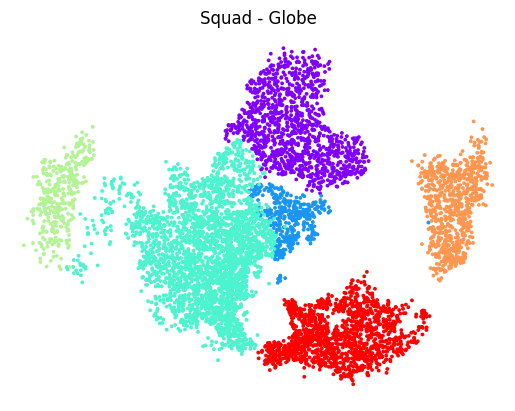

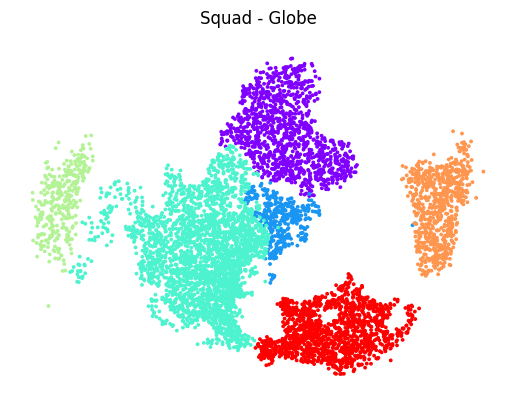

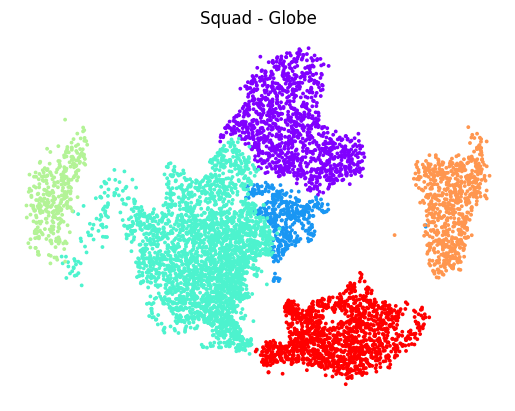

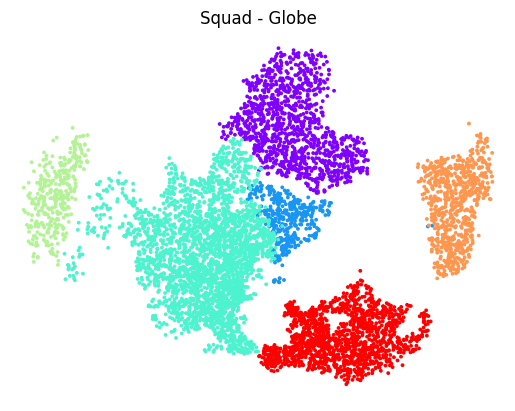

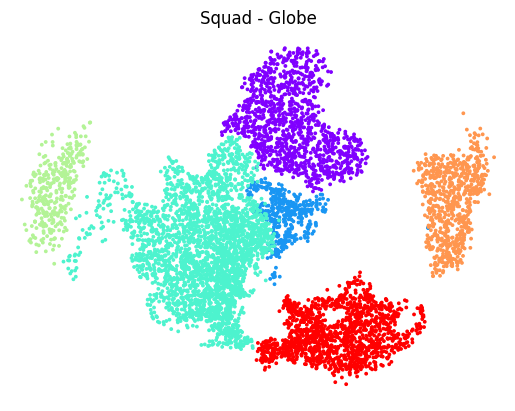

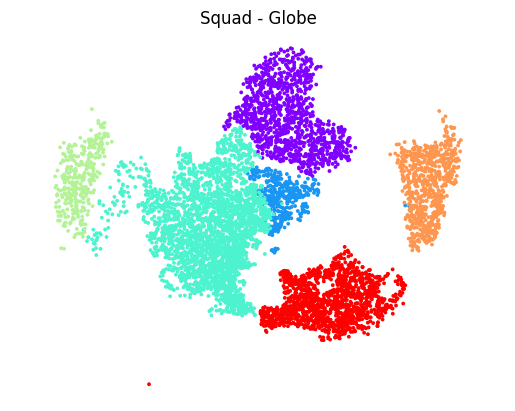

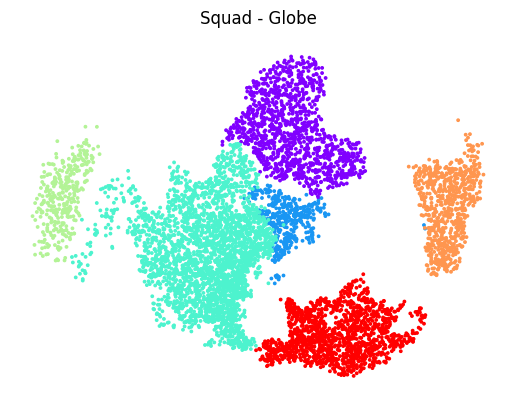

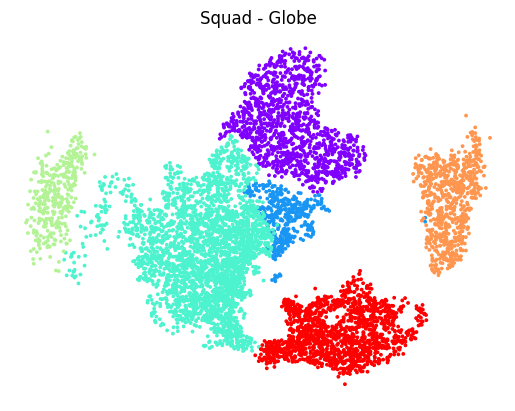

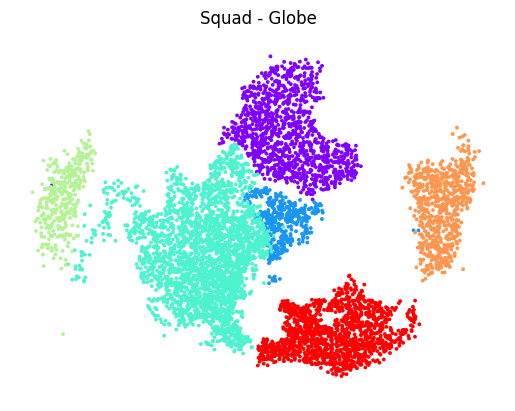

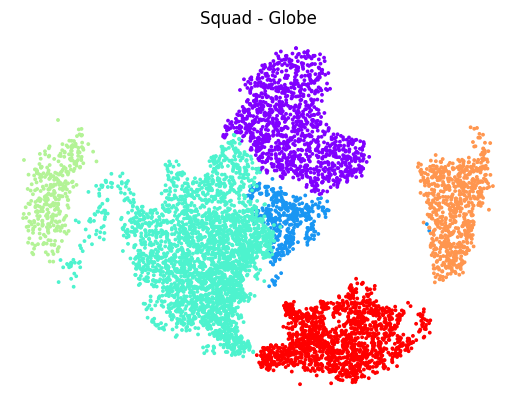

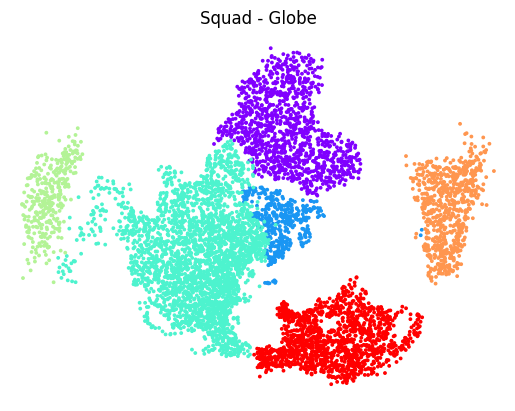

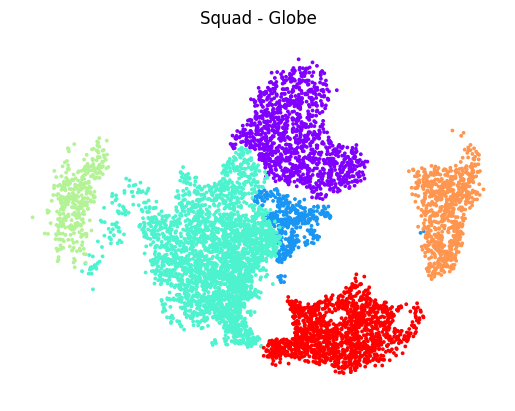

96


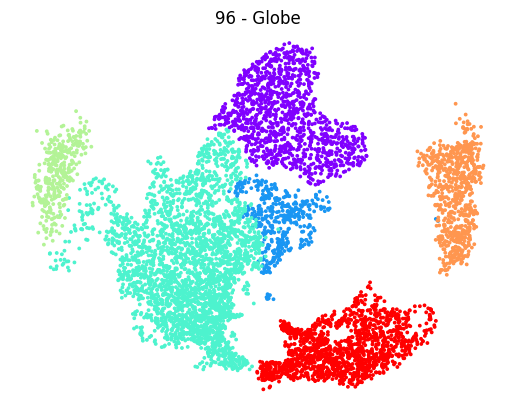

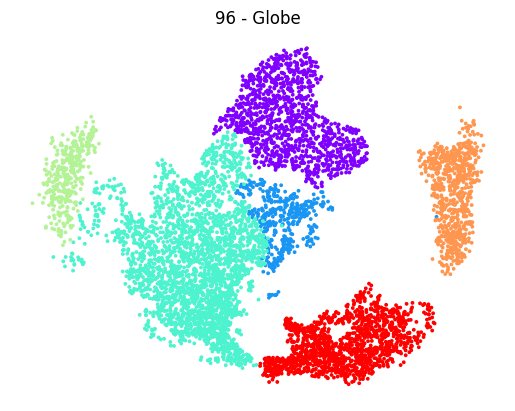

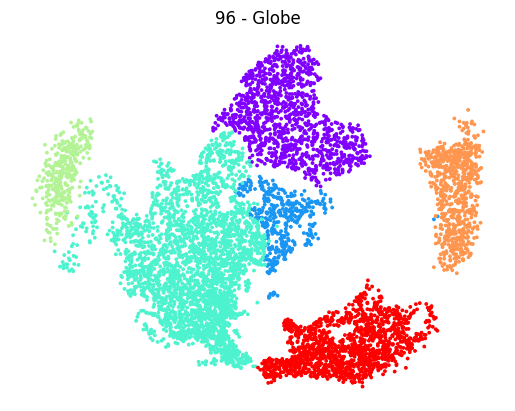

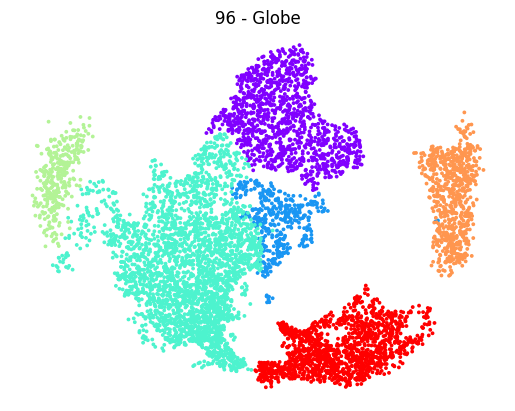

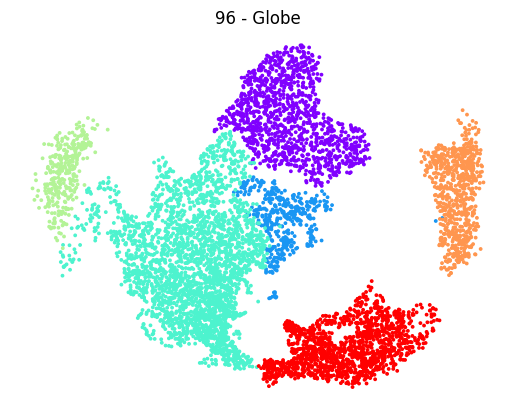

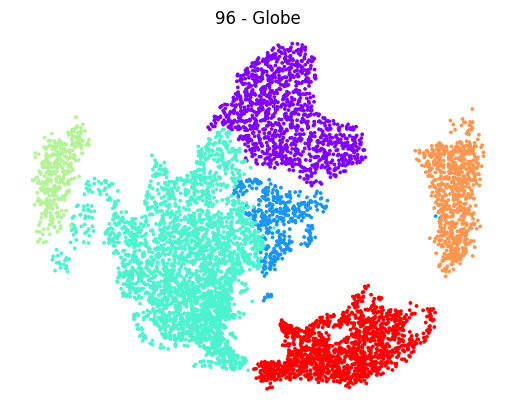

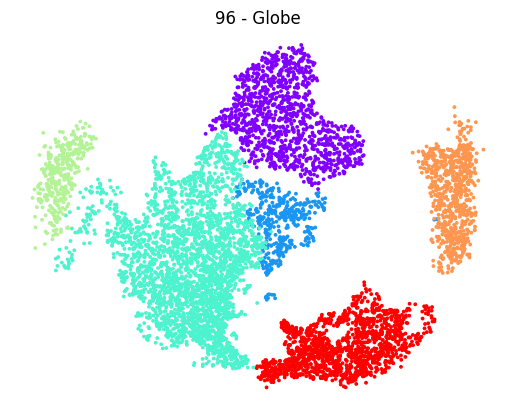

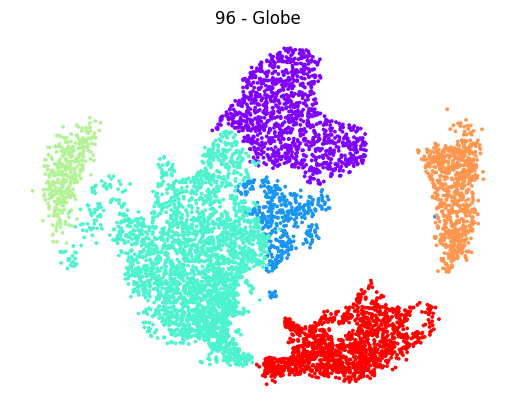

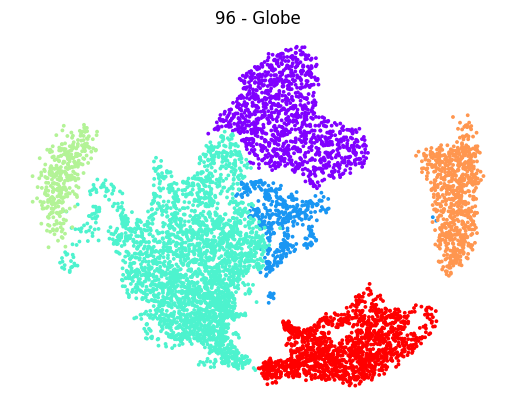

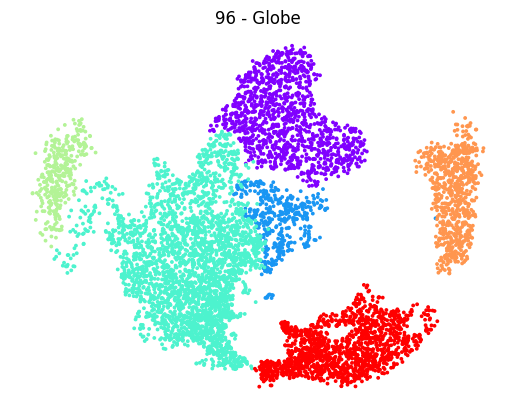

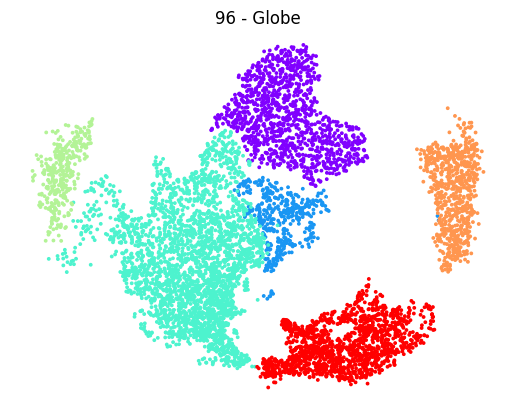

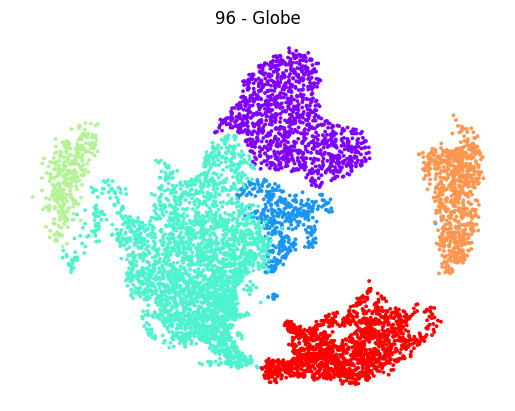

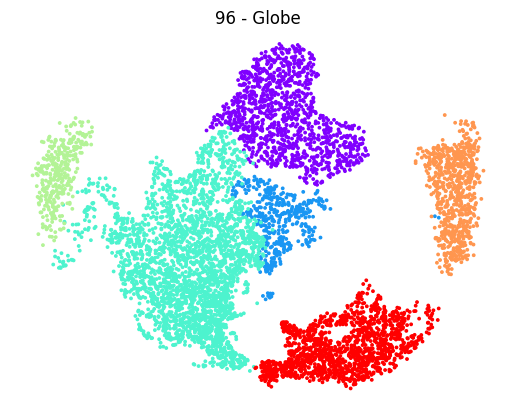

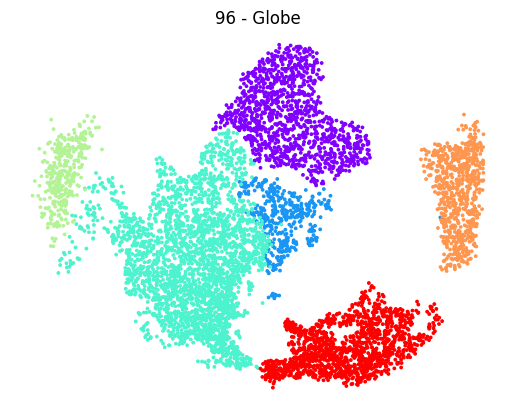

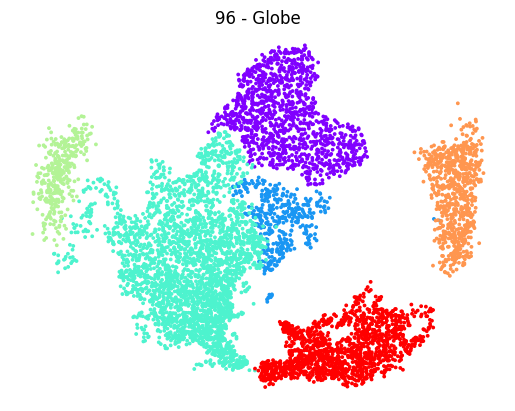

In [12]:
output_dir= (Path(PROJECT_ROOT).joinpath(
    Path(f"experiments/sned_vs_96/out/"))).resolve().absolute()



dataset_name = 'globe'
path_to_pickle = (Path(output_dir).joinpath(Path(f"layouts_{dataset_name}.pickle"))).resolve()
with open(path_to_pickle, 'rb') as file:
    layouts = pickle.load(file)

for type, layouts in layouts.items():
    print(type)
    for l in layouts:
        show_layout(l, use_labels=True, title=f"{type.capitalize()} - Globe")



In [1]:
# for name, dict in layouts.items():
#     print(name)
#     for type, ls in dict.items():
#         print(type)
#         for l in ls:
#             print(l.iteration_number)

NameError: name 'layouts' is not defined

In [7]:
# dataset_names = ['rna N3k']
# # 'coli20', 'globe', 'fashion mnist', 'mnist']
# output_dir= (Path(PROJECT_ROOT).joinpath(
#     Path(f"experiments/sned_vs_96/out/"))).resolve().absolute()
#
# for dataset_name in dataset_names:
#     path_to_pickle = (Path(output_dir).joinpath(Path(f"layouts_{dataset_name}.pickle"))).resolve()
#     with open(path_to_pickle, 'rb') as file:
#         layouts = pickle.load(file)
#
#     results_arr = np.zeros((2,15,4))
#     print(dataset_name)
#     for j, version in enumerate(["squad", "96"]):
#         for i,layout in enumerate(layouts[version]):
#             print(f"Layout: {i}")
#             stress = layout.get_final_stress()
#             kmeans_f1 = get_kmeans_f1(layout.get_final_positions(), layout.labels)
#             k, f1_for_best_k_with_knn =  get_f1_for_best_k_with_knn(lower_bound=1, upper_bound=30,
#                                                                 cross_validation_folds=10,
#                                                                  data=layout.data,
#                                                                  labels=layout.labels)
#
#             results_arr[j,i,0] = stress
#             results_arr[j,i,1] = kmeans_f1
#             results_arr[j,i,2],results_arr[j,i,3] =k,  f1_for_best_k_with_knn
#
#     print(results_arr)
#     output_dir= (Path(PROJECT_ROOT).joinpath(
#         Path(f"experiments/sned_vs_96/out/"))).resolve().absolute()
#
#     path_to_pickle_arr = (Path(output_dir).joinpath(Path(f"results_arr_{dataset_name}.pickle"))).resolve()
#     with open(path_to_pickle_arr, 'wb') as pickle_out:
#         pickle.dump(results_arr, pickle_out)

In [8]:
dataset_name = 'coli20'
output_dir= (Path(PROJECT_ROOT).joinpath(
    Path(f"experiments/sned_vs_96/out/"))).resolve().absolute()
path_to_pickle = (Path(output_dir).joinpath(Path(f"results_arr_{dataset_name}.pickle"))).resolve()
with open(path_to_pickle, 'rb') as file:
    results_arr = pickle.load(file)


for j,metric in enumerate(["stress", "kmeans", "k", "knn"]):

        if j != 2:
            mean_squad = np.mean(results_arr[0,:,j])
            sd_squad = np.std(results_arr[0,:,j])

            mean_96 = np.mean(results_arr[1,:,j])
            sd_96 = np.std(results_arr[1,:,j])

            # tstat, pvalue = stats.ttest_ind(results_arr[0,:,j].round(decimals=2), results_arr[1,:,j].round(decimals=2), equal_var=False, alternative='two-sided')
            # result = np.format_float_scientific(pvalue, precision=2,min_digits=2)
            print(20*"#")
            print(f"Metric : {metric}")
            print(20*"#")

            print(f"Squad mean : {mean_squad}, SD: {sd_squad}")
            print(f"96 mean : {mean_96}, SD: {sd_96}")
        else:
            print(f"Squad mean k: {np.mean(results_arr[0,:,j])}")
            print(f"96 mean k: {np.mean(results_arr[1,:,j])}")


####################
Metric : stress
####################
Squad mean : 0.7094964198692714, SD: 0.0005064153079342161
96 mean : 0.30059194470807077, SD: 0.0002463413743831614
####################
Metric : kmeans
####################
Squad mean : 0.42253908432254217, SD: 0.018120594607074318
96 mean : 0.3730798484149974, SD: 0.013167402422057417
Squad mean k: 1.0
96 mean k: 1.0
####################
Metric : knn
####################
Squad mean : 0.9965873853528656, SD: 3.3306690738754696e-16
96 mean : 0.9965873853528656, SD: 3.3306690738754696e-16
